# Demonstration of Convolution Theorem

Illustrate the discrete convolution theorem.

F indicates Fourier transform operator and F{f} and F{g} are the fourier transform of "f" and "g" so we have:

$$ F\left \{ f * g \right \} = F\left \{ f \right \} \cdot F\left \{ g \right \} $$


$$ F(f\cdot g) = F\left \{  f \right \} * F\left \{  g \right \} $$




## Importing

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
from numpy.fft import fft2
from numpy.fft import ifft2


## Numeric sample

In [3]:
fr = np.linspace(-1,1,6)
f  = np.array([fr,2*fr,fr,fr])
print(f)

[[-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-2.  -1.2 -0.4  0.4  1.2  2. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]
 [-1.  -0.6 -0.2  0.2  0.6  1. ]]


In [4]:
hh = np.array([-1,0,+1])
h = np.array([hh,2*hh,hh])
print(h)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [5]:
g = ia.pconv(f,h)
print(g)

[[ 6.4  6.4 -3.2 -3.2 -3.2 -3.2]
 [ 8.   8.  -4.  -4.  -4.  -4. ]
 [ 9.6  9.6 -4.8 -4.8 -4.8 -4.8]
 [ 8.   8.  -4.  -4.  -4.  -4. ]]


## See that f and h are periodic images and the period is (H,W) that is the shape of f.

At the following code, the F and H need to be the same shape

In [6]:
#Deixar o h (3,3) com o mesmo shape de f (4,6)

aux = np.zeros(f.shape)
r,c = h.shape
aux[:r,:c] = h

F = fft2(f)
H = fft2(aux)

G = F * H

gg = ifft2(G)

print("Result gg: \n",np.around(gg))

Result gg: 
 [[  6.-0.j   6.-0.j  -3.-0.j  -3.-0.j  -3.+0.j  -3.-0.j]
 [  8.-0.j   8.-0.j  -4.-0.j  -4.-0.j  -4.+0.j  -4.-0.j]
 [ 10.-0.j  10.-0.j  -5.-0.j  -5.-0.j  -5.+0.j  -5.-0.j]
 [  8.-0.j   8.-0.j  -4.-0.j  -4.-0.j  -4.+0.j  -4.-0.j]]


### gg and g need to be equal:

In [7]:
print('The discrete convolution theorem worked?', np.allclose(gg.real,g)) 

The discrete convolution theorem worked? True


## Using an image to illustrate the discrete convolution theorem

See the original image (keyb,tif) and h

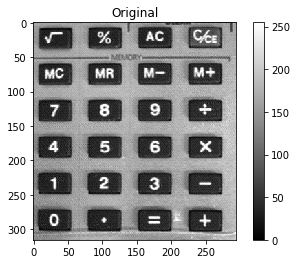

In [8]:
f = mpimg.imread('/home/lotufo/ia898/data/keyb.tif')
plt.imshow(f,cmap='gray');
plt.title('Original')
plt.colorbar()
plt.show()

In [9]:
hh = np.array([-1,0,+1])
h = np.array([hh,2*hh,hh])
print(h)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


## Convolution in frequency domain:

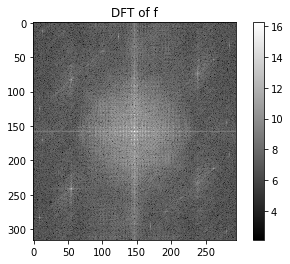

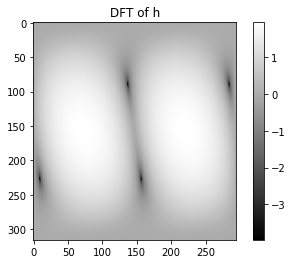

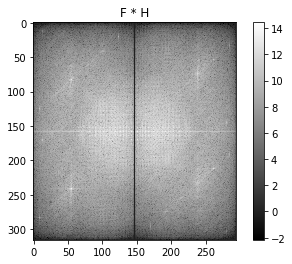

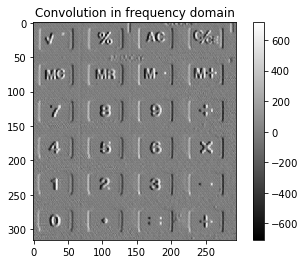

In [10]:
aux = np.zeros(f.shape)
r,c = h.shape
aux[:r,:c] = h

F = fft2(f)
H = fft2(aux)

x,y = f.shape
plt.figure(1)
plt.imshow(np.log(np.abs(ia.ptrans(F,(x//2,y//2))+1)),cmap='gray')
plt.title('DFT of f')
plt.colorbar()

plt.figure(2)
plt.imshow(np.log(np.abs(ia.ptrans(H,(x//2,y//2))+1)),cmap='gray')
plt.title('DFT of h')
plt.colorbar()


G = F * H

plt.figure(3)
plt.imshow(np.log(np.abs(ia.ptrans(G,(x//2,y//2))+1)),cmap='gray')
plt.title('F * H')
plt.colorbar()

gg = ifft2(G)

plt.figure(4)
plt.imshow(gg.real.astype(np.float),cmap='gray');
plt.title('Convolution in frequency domain')
plt.colorbar()
plt.show()

## Convolution in space domain

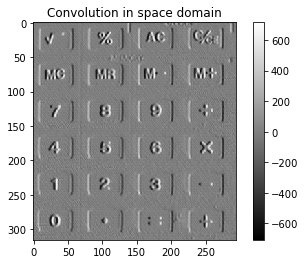

In [11]:
g = ia.pconv(f,h)

plt.imshow(g.real.astype(np.float),cmap='gray');
plt.title('Convolution in space domain')
plt.colorbar()
plt.show()

The convolution in frequency domain and space domain need to be equals

In [12]:
print('The discrete convolution theorem worked?', np.allclose(gg.real,g)) 

The discrete convolution theorem worked? True


## Contributions

Luis Antonio Prado, 1st semester 2017